# Random forest without the district #

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import platform
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [6]:
#Reading the pre_processed data
os_type = platform.system()
if os_type.startswith("Darwin"):
    data = pd.read_excel(r"dataset/processed_data/main/final_cleaned_dataset.xlsx")
else: 
    data = pd.read_excel(r"dataset\processed_data\main\final_cleaned_dataset.xlsx")
#Droping the target col
feature_value_temp = data.drop("Laboratory confirmed, since the beginning of the pandemic Hospitalized", axis=1)
#Droping the Distric col as it is string and will be assigned value by clustering
features = feature_value_temp.drop("District",axis=1)
features = features.drop("Unnamed: 0",axis=1)
features = features.drop("Laboratory confirmed, since the beginning of the pandemic TOTAL",axis=1)
features = features.drop("Laboratory confirmed, since the beginning of the pandemic RecoveredA",axis=1)
features = features.drop("Laboratory confirmed, since the beginning of the pandemic Deceased",axis=1)


data['flag'] = 3  # Initialize the 'flag' column with 3
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 449, 'flag'] = 2
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 290, 'flag'] = 1

target_col = data["flag"]

In [45]:
features.head()

,"Laboratory confirmed, since the beginning of the pandemic Difference from","Laboratory confirmed, since the beginning of the pandemic Deceased","Laboratory confirmed, since the beginning of the pandemic Current CasesB","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,+USAFD","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,<20 Jahre","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,20-59 JahreE","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,>=60 Jahre"
0,4,52.0,102,50.0,132.2,49.0,7.1
1,0,101.0,22,8.5,8.4,12.1,2.6
2,1,123.0,37,9.3,24.0,4.4,8.2
3,1,150.0,46,14.3,21.6,19.5,2.3
4,0,142.0,56,18.3,41.4,20.0,2.0


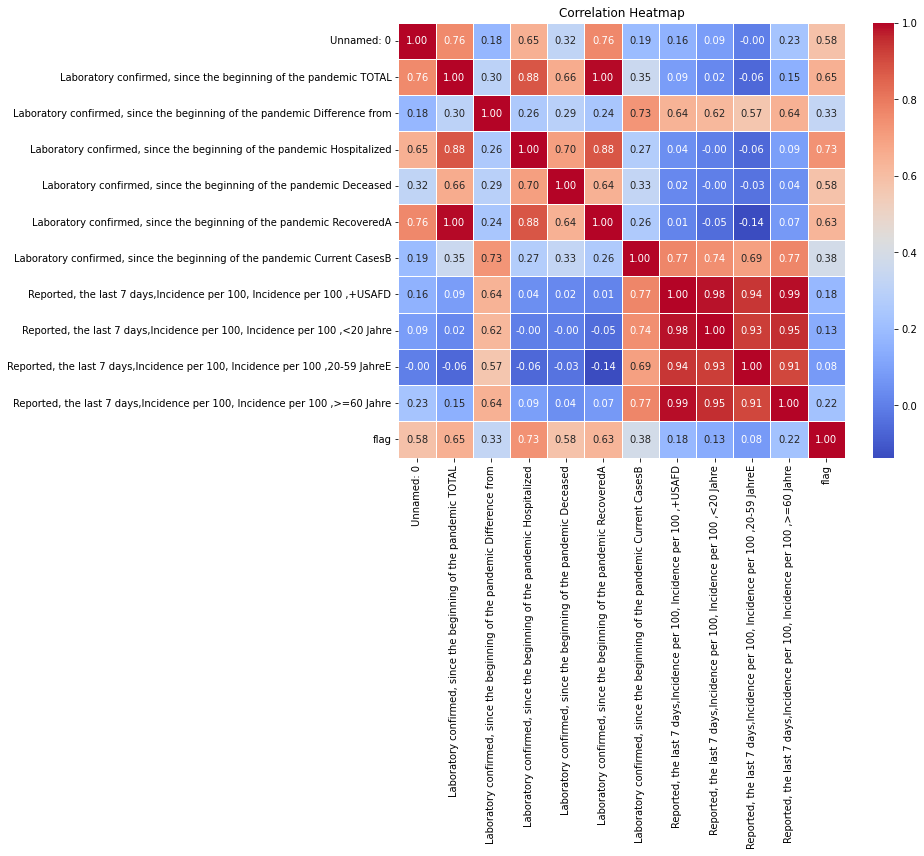

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target_col, test_size=0.3, random_state=29)

In [25]:
# mse_value = []
# estimators_ = []
# for estimator in range(50,150):
#     RF_model = RandomForestRegressor(n_estimators = estimator ,random_state= 22)
#     RF_model.fit(X_train,y_train)
#     y_pred = RF_model.predict(X_test)
#     estimators_.append(estimator)
#     mse_value.append(mean_squared_error(y_test, y_pred))

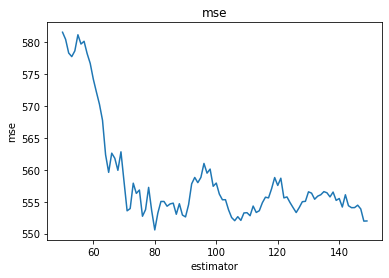

In [5]:
import matplotlib.pyplot as plt
plt.plot(estimators_, mse_value)
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

In [26]:
# mse_value = []
# estimators_ = []
# for estimator in range(150,250):
#     RF_model = RandomForestRegressor(n_estimators = estimator ,random_state= 22)
#     RF_model.fit(X_train,y_train)
#     y_pred = RF_model.predict(X_test)
#     estimators_.append(estimator)
#     mse_value.append(mean_squared_error(y_test, y_pred))


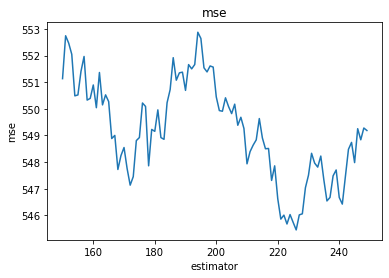

In [7]:
plt.plot(estimators_, mse_value)
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

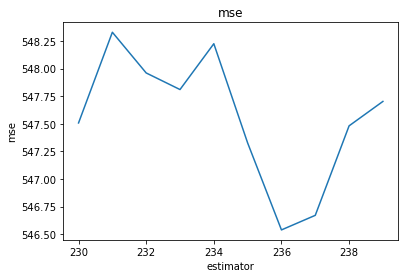

In [10]:
plt.plot(estimators_[80:90], mse_value[80:90])
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

In [27]:
# from math import sqrt
# RF_model = RandomForestRegressor(n_estimators = 236 ,random_state= 22)
# RF_model.fit(X_train,y_train)
# y_pred = RF_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = sqrt(mse)
# print(f"Root Mean Squared Error: {rmse}")
# print(f"Mean Squared Error: {mse}")
# print("R2 Score:", r2_score(y_test, y_pred))

Root Mean Squared Error: 0.10564311513104667
Mean Squared Error: 0.01116046777459158
R2 Score: 0.9838670802095539


In [12]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

model = RandomForestClassifier(n_estimators=50, random_state= 22)
model.fit(X_train,y_train)
# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print("R2 Score:", r2_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Root Mean Squared Error: 0.5876303100058106
Mean Squared Error: 0.34530938123752497
R2 Score: 0.5008409447607218
Accuracy: 0.77
Recall: 0.77
Precision: 0.76
F1 Score: 0.77


In [60]:
import joblib

# Save the model to a file using joblib
model_filename = 'RandomForestClassifierTA_1.pkl'
joblib.dump(RF_model, model_filename)

['RandomForestClassifierTA_1.pkl']

In [13]:
import os
import csv
csv_file = "model_metrics.csv"
model_name= "Random Forest"
# Check if the CSV file exists, and create it with a header if it doesn't
if not os.path.exists(csv_file):
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Model Name", "Accuracy", "Recall", "Precision", "F1 Score","Mse","RMSE"])

# Append the values to the CSV file
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([model_name, accuracy, recall, precision, f1,mse,rmse])

print(f"Metrics appended to {csv_file} for {model_name}.")

Metrics appended to model_metrics.csv for Random Forest.
